# Project: Investigate a Dataset - No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset represents 110527 medical appointments in Brazil and focuses on wheter the patient showed up in his appointment or not alongside some properties of each patient.

The dataset has the following columns which are self-explanatory:
* PatientId
* AppointmentID
* Gender
* ScheduledDay
* AppointmentDay
* Age
* Neighbourhood
* Scholarship
* Hipertension
* Diabetes
* Alcoholism
* Handcap
* SMS_received
* No-show (No means the patient showed up, Yes means he didn't show up)


### Question(s) for Analysis

* What day of the week has the most no-show appointments?
* Is there a specific illness associated with the no-show?
* Is there a change (increase or decrease) in the no-show over the years?
* Is there an association between the scholarship and the no-show?
* Is there an association between the age and the no-show?
* Do patients who receive SMS show up more than patients who don't receive SMS?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing values. Data type of `PatientId` needs to be integer though it's not a big deal. `ScheduledDay` is string, needs to be DateTime type, same as AppointmentDay. `No-Show` needs to be encoded into 1 or 0.

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Apparently, `Age` has some false values (like -1).

In [6]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

No duplicates.

In [8]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

Handcap columns should have binary values, no 2's, 3's and 4's. Should remove all these rows.


### Data Cleaning 

In [9]:
# Fixing data types
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

Converting the dates in the `ScheduledDay` and `AppointmentDay` to datetime data type.

In [10]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [11]:
# Encoding the No-show column
df['No-show'] = df['No-show'].str.replace('Yes', '1')
df['No-show'] = df['No-show'].str.replace('No', '0')
df['No-show'] = df['No-show'].astype('int')

Encoding the `No-show` column into 0's and 1's, where Yes equals 1 and No equals 0.

In [12]:
# Remove rows with Handcap values > 1
df = df[df['Handcap'] < 2]

Removing all non-binary handcap rows.

In [13]:
# Removing negative ages
df = df[df['Age'] > 0]

Removing rows with ages less than zero.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : What day of the week has the most no-show appointments?

In [14]:
# Creating two new columns with the day of the week corresponding to the given date
df['scheduled_dayOfWeek'] = df.ScheduledDay.dt.dayofweek
df['appointment_dayOfWeek'] = df.AppointmentDay.dt.dayofweek

In [15]:
# Mapping the numeric value of the day of the week to its corresponding string
df['scheduled_dayOfWeek'] = df['scheduled_dayOfWeek'].map({0: 'Monday', 1:'Tuesday', 2:'Wedensday', 3: 'Thursday', 4:'Friday', 5: 'Saturday', 6: 'Sunday'})
df['appointment_dayOfWeek'] = df['appointment_dayOfWeek'].map({0: 'Monday', 1:'Tuesday', 2:'Wedensday', 3: 'Thursday', 4:'Friday', 5: 'Saturday', 6: 'Sunday'})

In [16]:
# function to plot a horizontal bar plot in one line
def plot_barh(series, title, xlabel, ylabel, figsize, color, alpha):
    series.plot(kind='barh', figsize=figsize, color=color, alpha=alpha)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

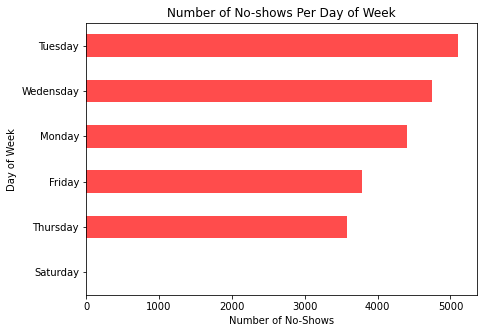

In [17]:
# Plotting the number of no-shows per day of the week
plot_barh(df.groupby('scheduled_dayOfWeek')['No-show'].sum().sort_values(),
          title='Number of No-shows Per Day of Week', 
          xlabel='Number of No-Shows',
          ylabel='Day of Week',
          figsize=(7,5),
          color='r',
          alpha=0.7)

In [18]:
((df['scheduled_dayOfWeek'] == 'Saturday') & (df['No-show'] == 1)).sum()

1

Tuesday is the day with the most no-shows in the week.

### Research Question 2 : Is there a specific illness associated with the no-show?

In [19]:
illnesses = df.loc[:, 'Hipertension':'No-show'].drop('SMS_received', axis=1)
illnesses.head()

,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,1,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,1,0,0,0


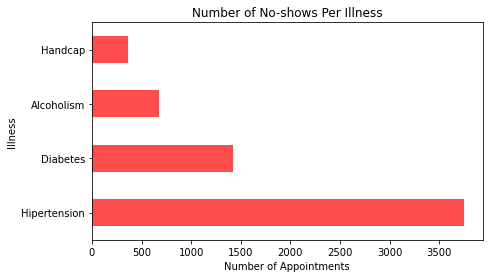

In [20]:
# Plotting the number of no-shows per illness
plot_barh(illnesses.loc[illnesses['No-show'] == 1, 'Hipertension':'Handcap'].sum(),
          title='Number of No-shows Per Illness', 
          xlabel='Number of Appointments',
          ylabel='Illness',
          figsize=(7,4),
          color='r',
          alpha=0.7)

Patients with Hipertension are the majority of ill patients who didn't show up. However, there is no clear association between people who have hipertension and those who don't show up.

### Research Question 3: Is there a change (increase or decrease) in the no-show over the years?

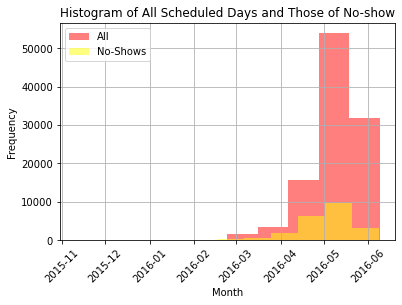

In [21]:
df['ScheduledDay'].hist(alpha=0.5, color='red', label='All')
df[df['No-show'] == 1]['ScheduledDay'].hist(alpha=0.5, color='yellow', label='No-Shows')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Histogram of All Scheduled Days and Those of No-show');
plt.legend();

Clearly, from the histogram we see that the data was collected over 8 months only, with the majority of scheduled appointments from April 2016 to June 2016. Therefore, it is clear that number of no-show patients started increasing from March 2016 until May 2016 then started dropping again in June 2016.

### Research Question 4: Is there an association between the scholarship and the no-show?

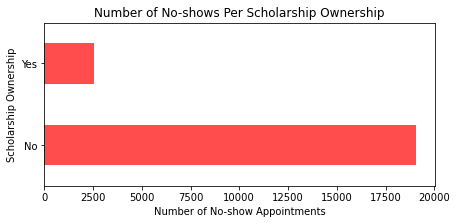

In [22]:
# Plotting the number of No-show of those who had the scholarship and those who had not
plot_barh(df.groupby('Scholarship')['No-show'].sum(),
          title='Number of No-shows Per Scholarship Ownership', 
          xlabel='Number of No-show Appointments',
          ylabel='Scholarship Ownership',
          figsize=(7,3),
          color='r',
          alpha=0.7)

plt.yticks(ticks=range(2), labels=['No', 'Yes']);

Clearly, more patients with no scholarship don't show up on their appointments.

### Research Question 5: Do patients who receive SMS show up more than patients who don't receive SMS?

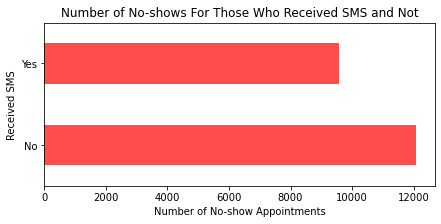

In [23]:
# Plotting the number of No-show of those who received SMS and those who did not
plot_barh(df.groupby('SMS_received')['No-show'].sum(),
          title='Number of No-shows For Those Who Received SMS and Not', 
          xlabel='Number of No-show Appointments',
          ylabel='Received SMS',
          figsize=(7,3),
          color='r',
          alpha=0.7)
plt.yticks(ticks=range(2), labels=['No', 'Yes']);

It is also clear that patients who didn't receive a SMS didn't show up to their appointments more.

### Research Question 6: Is there an association between the age and the no-show?

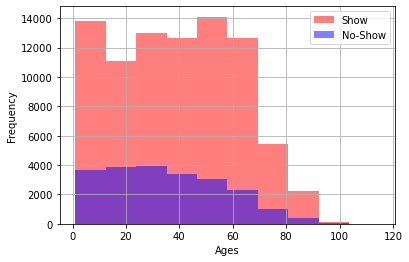

In [24]:
df[df['No-show'] == 0]['Age'].hist(color='r', alpha=0.5, bins=10, label='Show')
df[df['No-show'] == 1]['Age'].hist(color='b', alpha=0.5, bins=10, label='No-Show')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.legend();

Both patients who show up and thos who don't show up have similar age distributions. However, where most of the patients' ages who do show up are less than 70, the distribution of patients who don't show up are more spread out.

<a id='conclusions'></a>
## Conclusions

From the analysis, it turns out that more patients who didn't receive a SMS of their appointment did not show up. It also turns out that significantly more patients who didn't have the scholarship did not show up. Moreover, Hipertension was the most common illness among patients who did not show up, followed by diabetes, alcholoism and handcap. Furthermore, Tuesday is the most common day when patients don't show up. Also, there doesn't seem to be a relationship between the ages and the number of patients who do not show up. However, patients who do show up are more concentrated in the range below 70 years old, while people who don't show up have more spread out distribution. Finally, the number of patients who don't show up increased until May 2016 before it dropped in June 2016.

### Limitations

In this analysis, no statistical tests were done so we don't claim any causality between the different variables and the number of no-show appointments. Statistical tests have to be made in order to test if introducing the different treatments have caused significant change of the distribution of the number of no-show appointments.

## Submitting your Project 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])